# Solving regression problems with python
### First we are gonna to create a synthetic data, suposse we have a historic record of house prices according to their size.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


X = np.linspace(0,20,100)   
# Just create a ficticial relationship and ignore that we know it xD
Y = (-2*X**3 + X**4.5 + 100000*np.random.rand(X.shape[0]))/1000

plt.plot(X,Y,'.')
plt.xlabel('Size (feet)^2')
plt.ylabel('Price')

plt.show()

# K-Nearest Neighbors

## This is a nonparametric model that predict from the data (There is no an actual training stage in this model, for each new sample the prediction is performed using the training data). Therefore if we want to save this model, we need to save all the data.

### How works?
As input we receive an Xref matrix that is the training data (size of the houses). The vector Yref is the vector that contains all the labels (prices) of the training data, i.e., for a size X what is the price Y. We also receive a Xtest matrix that are the sample to which we want to predict their response value (price of the house). 

For each new sample we need to compute the distance of this sample to the samples in the Xref (training data).
## \begin{equation} d(x_{new}, x) = \lvert x_{new} - x \lvert  \end{equation}

Let V be the set of the K-nearest neighbors of the sample x. The prediction is computed averaging the labels of the nearest neighbors:

## \begin{equation} prediction(x_{new}) = \frac{1}{K} \sum_{y^{(i)} \, | \, x^{(i)} \in V } y^{(i)} \end{equation}


In [2]:
def KnnRegression(Xref,Xtest,Yref,k=5):  
    M = Xtest.shape[0]
    N = Xref.shape[0]
    
    prediction = np.zeros(shape=(M))
    distance = np.zeros(shape=(N))
    
    for i in range(M):
        for j in range(N):
            distance[j] = np.abs(Xtest[i]-Xref[j])
            
        indices = np.argsort(distance)[:k] 
        prediction[i] = np.mean(Yref[indices])
    
    return prediction

# Let's create new data in the same range, and plot the prediction of the model in orange.

Text(0,0.5,'Price')

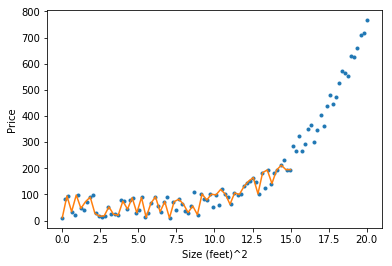

In [3]:
newData = np.linspace(0,15,50)

prediction = KnnRegression(X,newData,Y,k=1)

plt.plot(X,Y,'.')
plt.plot(newData,prediction)
plt.xlabel('Size (feet)^2')
plt.ylabel('Price')

# How to select the best k for our data?

## It's validation time!

## Scikit-Learn offers a function that split our data in the number of folds that we want

In [4]:
from sklearn.model_selection import KFold

In [5]:
nfolds = 2
kf = KFold(n_splits=nfolds)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

TRAIN: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]


# In the literature, researchers usually uses 10 folds to test their data

## First, we need to divide our data in 20% for test and 80% for validation

In [6]:
M = X.shape[0]

indices = np.random.permutation(M)

Xval = X[indices[:int(0.8*M)]]
Yval = Y[indices[:int(0.8*M)]]

Xtest = X[indices[int(0.8*M):]]
Ytest = Y[indices[int(0.8*M):]]

In [7]:
print(Xval.shape)
print(Xtest.shape)

(80,)
(20,)


In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


nfolds = 10
kf = KFold(n_splits=nfolds)


K_values = np.arange(1,100,5)

Results_R_score = np.zeros((K_values.shape[0],10))
Results_MAE = np.zeros((K_values.shape[0],10))
Results_MSE = np.zeros((K_values.shape[0],10))

for index, k in enumerate(K_values):
    fold = 0
    for train_index, test_index in kf.split(Xval):
        
        X_train, X_test = Xval[train_index], Xval[test_index]
        y_train, y_test = Yval[train_index], Yval[test_index]

        prediction = KnnRegression(X_train,X_test,y_train,k)

        Results_R_score[index,fold] = r2_score(y_test, prediction)
        Results_MAE[index,fold] = mean_absolute_error(y_test, prediction)
        Results_MSE[index,fold] = mean_squared_error(y_test, prediction)
        
        fold = fold + 1

In [9]:
np.mean(Results_MAE, axis = 0)

array([ 65.88308948,  71.87376378,  88.00741415, 115.71559878,
       139.99914835, 156.08538099,  84.65725362, 107.32497102,
       102.21782728,  63.42642517])

In [10]:
Bestsolution = np.argmin(np.mean(Results_MAE, axis = 0))
Bestsolution

9

In [11]:
K_values[Bestsolution]

46

Text(0,0.5,'Price')

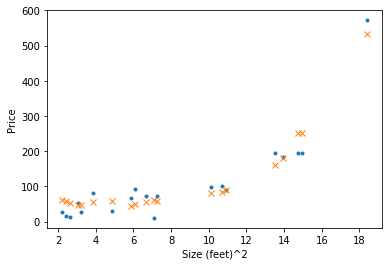

In [12]:
prediction = KnnRegression(Xval,Xtest,Yval,k=6)

plt.plot(Xtest,Ytest,'.')
plt.plot(Xtest,prediction,'x')
plt.xlabel('Size (feet)^2')
plt.ylabel('Price')

In [13]:
np.mean(Results_MAE,axis = 0)

array([ 65.88308948,  71.87376378,  88.00741415, 115.71559878,
       139.99914835, 156.08538099,  84.65725362, 107.32497102,
       102.21782728,  63.42642517])